In [1]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

            Precipitation
Date                     
2016-08-23           0.00
2016-08-23           0.15
2016-08-23           0.05
2016-08-23           0.02
2016-08-23           1.79


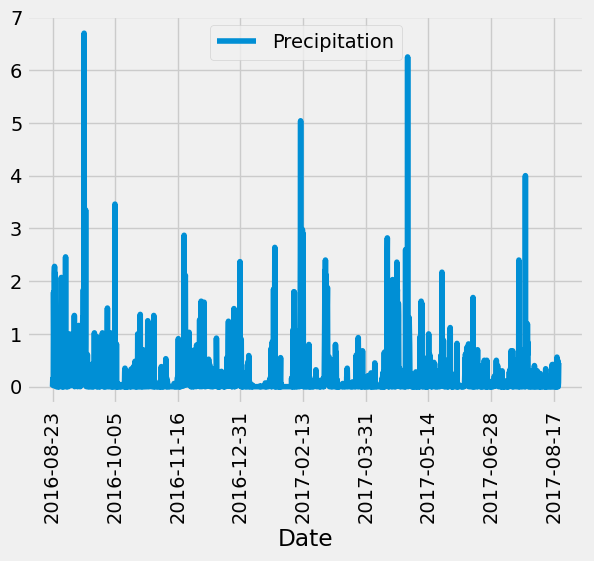

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# recent_date[0]
year_ago = str(dt.date(2017,8,23) - dt.timedelta(days = 365))
# year_ago

# Perform a query to retrieve the data and precipitation scores
year_prcp_query = session.query(measurement.date,measurement.prcp).\
    filter(measurement.date >= year_ago).\
    order_by(measurement.date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
year_prcp_df = pd.DataFrame(year_prcp_query,columns=["Date","Precipitation"])
year_prcp_df = year_prcp_df.dropna()
year_prcp_df=year_prcp_df.set_index("Date")
print(year_prcp_df.head())

# Use Pandas Plotting with Matplotlib to plot the data
year_prcp_df.plot(rot=90)
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
year_prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).count()

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_stations[0][0]
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
    filter(measurement.station == active_stations[0][0]).all()

[(54.0, 85.0, 71.66378066378067)]

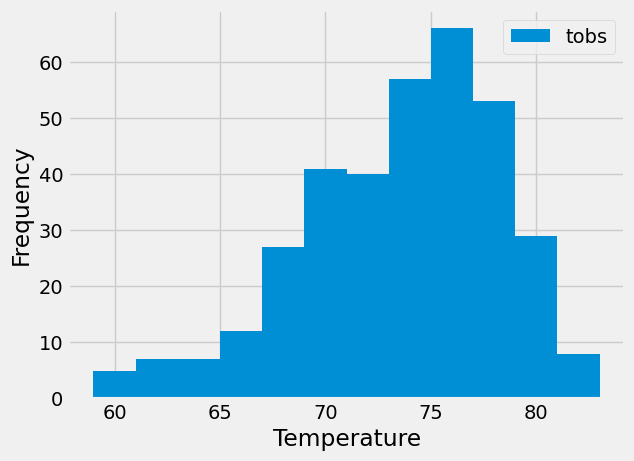

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_ago = str(dt.date(2017,8,23) - dt.timedelta(days = 365))
# year_ago
year_temp_query = session.query(measurement.tobs).\
    filter(measurement.station == active_stations[0][0]).\
    filter(measurement.date >= year_ago).all()
# year_temp_query

year_temp_df = pd.DataFrame(year_temp_query,columns=["tobs"])
# print(year_temp_df.head())

year_temp_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.show()

# Close Session

In [25]:
# Close Session
session.close()